<a href="https://colab.research.google.com/github/jmacedo91/Studying-ISLP/blob/main/Chapter_3_Linear_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# An Introduction to Statistical Learning

# Chapter 3 - Linear Regression


##3.1 Simple Linear Regression

Simple linear regression lives up to its name: it is a very straightforward simple linear
regression approach for predicting a quantitative response Y on the basis of a single predictor variable X. It assumes that there is approximately a linear
relationship between X and Y . Mathematically, we can write this linear
relationship as

$$Y \approx \beta_{0} + \beta_{1}X$$

You might read “$\approx$” as “is approximately modeled as”. We will sometimes
describe (3.1) by saying that we are regressing Y on X (or Y onto X).

In Equation 3.1, $\beta_{0}$ and $\beta_{1}$ are two unknown constants that represent the *intercept* and *slope* terms in the linear model. Together, $\beta_{0}$ and $\beta_{1}$ are known as the model coefcients or parameters. Once we have used our training data to produce estimates $\hat\beta_{0}$ and $\hat\beta_{1}$ for the model coefcients, we can predict future sales on the basis of a particular value of TV advertising by computing

$$\hat y = \hat\beta_{0} + \hat\beta_{1}x$$

where $\hat y$ indicates a prediction of Y on the basis of $X = x$. Here we use a hat symbol, ˆ , to denote the estimated value for an unknown parameter or coefficient, or to denote the predicted value of the response.

###3.1.1 Estimating the Coefficients

In practice, $\beta_{0}$ and $\beta_{1}$ are unknown. So before we can use (3.1) to make predictions, we must use data to estimate the coefficients. Let

$$(x_{1},y_{1}), (x_{2},y_{2}),..., (x_{n},y_{n})$$

represent $n$ observation pairs, each of which consists of a measurement of
X and a measurement of Y . In the **Advertising** example, this data set consists of the TV advertising budget and product sales in n = 200 diferent
markets. (Recall that the data are displayed in Figure 2.1.) Our goal is to
obtain coefficient estimates $\beta_{0}$ and $\beta_{1}$ such that the linear model (3.1) fits the available data well—that is, so that $y_{i} ≈ \beta_{0} + \beta_{1}x_{i}$ for $i$ = 1,...,$n$. In other words, we want to fnd an intercept $\beta_{0}$ and a slope $\beta_{1}$ such that the resulting line is as close as possible to the n = 200 data points. There are a number of ways of measuring closeness. However, by far the most common approach involves minimizing the least squares criterion, and we take least squares that approach in this chapter. Alternative approaches will be considered in Chapter 6

The least squares approach chooses $\hat\beta_{0}$ and $\hat\beta_{1}$ to minimize the RSS. Using some calculus, one can show that the minimizers are

$$\hat\beta_{1} = \frac{\sum_{i=1}^n(x_{i} - \bar{x})(y_{i} - \bar{y})}{\sum_{i=1}^n(x_{i} - \bar{x})^2}$$

$$\hat\beta_{0} = \bar{y} - \hat\beta_{1}\bar{x}$$



In other words, (3.4) defnes the least squares coefcient estimates for simple linear regression.

In [1]:
#Data Analysis
import pandas as pd
import numpy as np
import statsmodels.api as sm

#Data Visualization
import seaborn as sns
sns.set_theme(style='whitegrid')
import matplotlib.pyplot as plt
%matplotlib inline
plt.rc('figure', figsize = (9, 6))

In [2]:
from google.colab import files
uploaded = files.upload()

Saving Advertising.csv to Advertising (2).csv


In [3]:
advertising = pd.read_csv('Advertising.csv', index_col='Unnamed: 0')

In [4]:
advertising.head()

,TV,radio,newspaper,sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9


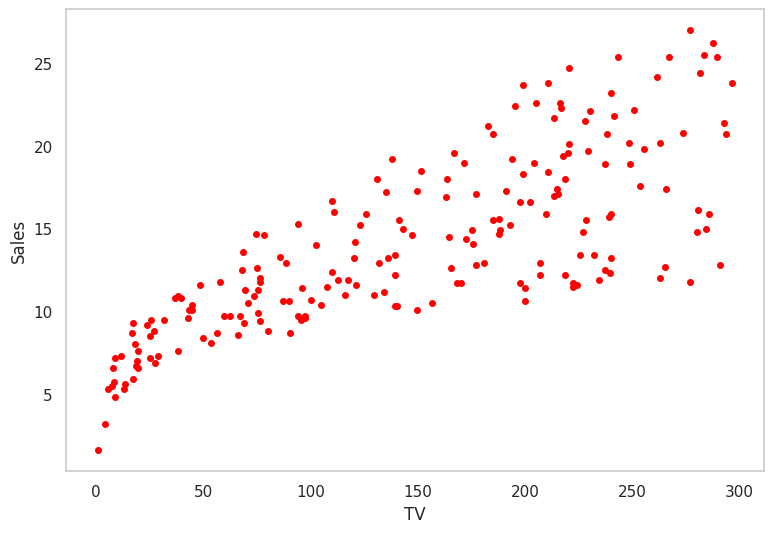

In [5]:
plt.scatter(x=advertising['TV'], y=advertising['sales'], c='red', s=16)
plt.xlabel('TV')
plt.ylabel('Sales')
plt.grid(False)

In [6]:
def estimating_coefficients(x, y):
  x_mean = np.mean(x)
  y_mean = np.mean(y)

  numerator = np.sum((x - x_mean) * (y - y_mean))
  denominator = np.sum((x - x_mean) ** 2)

  beta_1 = numerator/denominator
  beta_0 = y_mean - (beta_1 * x_mean)

  return (beta_1, beta_0)

In [7]:
beta_1, beta_0 = estimating_coefficients(x=advertising['TV'], y=advertising['sales'])

In [8]:
print(f"The slope coefficient is: {round(beta_1, 4)}")
print(f"The intercept coefficient is: {round(beta_0, 2)}")

The slope coefficient is: 0.0475
The intercept coefficient is: 7.03


In [9]:
def plot_linear_regression(x, y, x_label, y_label):
  x_mean = np.mean(x)
  y_mean = np.mean(y)

  numerator = np.sum((x - x_mean) * (y - y_mean))
  denominator = np.sum((x - x_mean) ** 2)

  beta_1 = numerator/denominator
  beta_0 = y_mean - (beta_1 * x_mean)

  y_predicted = beta_0 + beta_1*x

  plt.scatter(x=x, y=y, c='red', s=12)
  plt.plot(x, y_predicted, color='blue')
  plt.xlabel(x_label)
  plt.ylabel(y_label)
  plt.grid(False)

  plt.vlines(x=x, ymin=y, ymax=y_predicted, colors='gray', linewidth=1)
  plt.show()

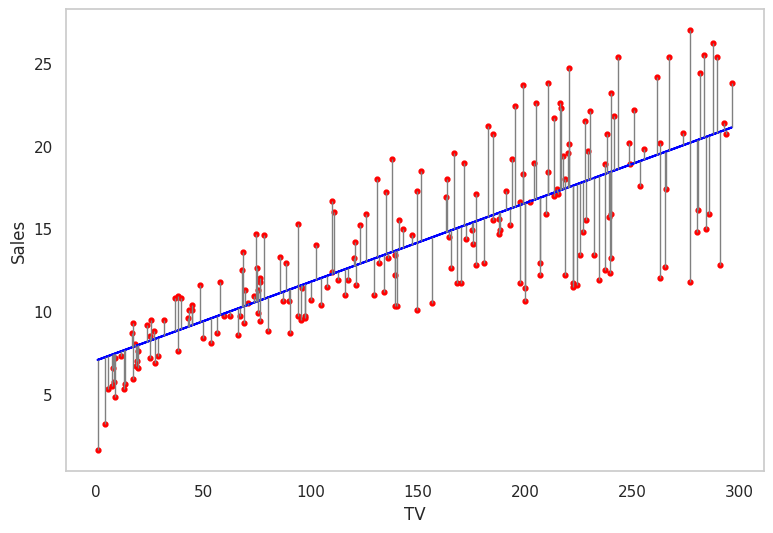

In [10]:
plot_linear_regression(x=advertising['TV'], y=advertising['sales'], x_label='TV', y_label='Sales')